In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Initial setup.
The images in the dataset are all assumed to be valid and are all the same size. 

In [9]:
from fastcore.all import *
from fastai.vision.all import *

In [10]:
image_types = ('fake', 'real')
path = Path('/kaggle/input')

In [11]:
# classifier function
image_type = lambda img : Path(img).parent.name

#quick test: should return Fake
print(image_type(path/'train'/'Fake'/'fake_0.jpg'))

#quick test: should return Real
print(image_type(path/'train'/'Real'/'real_0.jpg'))

Fake
Real


The above is not necessary because fast_ai provides us with *parent_label()*

We need to split based on the folder names

In [12]:
splitter=GrandparentSplitter(train_name='Train',valid_name='Validation')     
file_examples=[path/'Train/Fake/fake_0.jpg', path/'Validation/Fake/fake_0.jpg',
              path/'Train/Real/real_0.jpg',path/'Validation/Real/real_0.jpg']

# check if the files are split correctly
train_idx, valid_idx = splitter(file_examples)
print(train_idx) #[0,2]
print(valid_idx) #[1,3]

[0, 2]
[1, 3]


Now, we can train our model.

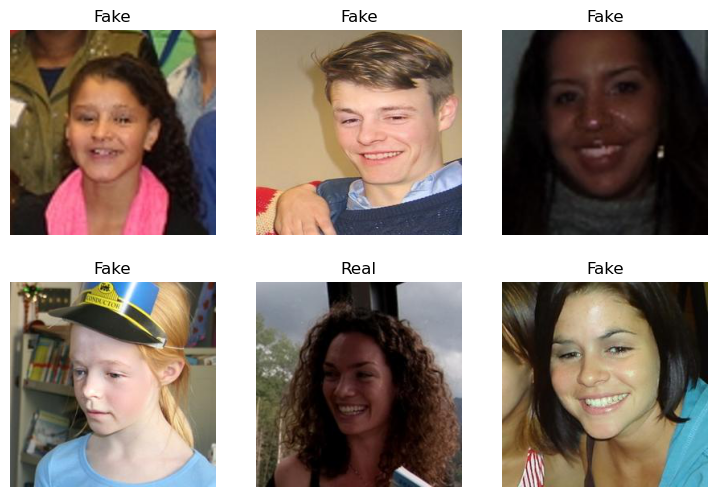

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_y=parent_label,
    get_items=get_image_files,
    splitter=splitter
).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/model

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.158779,0.224430,0.089733,21:24


epoch,train_loss,valid_loss,error_rate,time
0,0.072129,0.100668,0.041544,13:41
1,0.037511,0.052585,0.018667,14:13
2,0.021381,0.045831,0.013924,12:54


Export the model

In [15]:
learn.export()

Check that the file exists

In [16]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

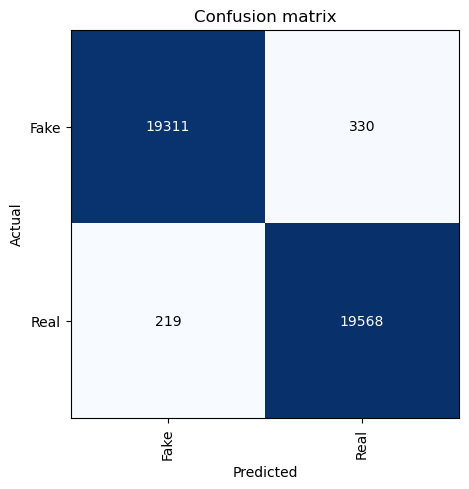

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()